<a href="https://colab.research.google.com/github/neetinds/MTECH-CPAD_G30-London-Borough/blob/main/Stock_Price_Prediction_Using_LSTM_%26_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

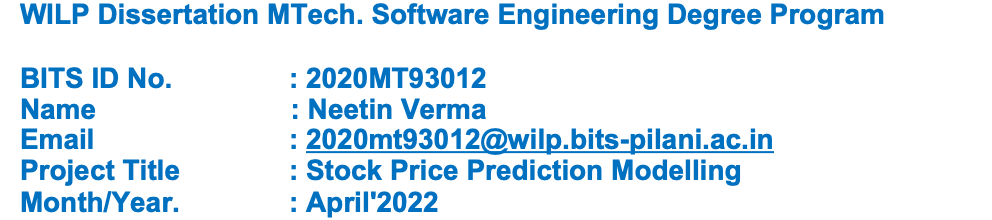





## **1. Stock Price Predicting with LSTM**

Neural Networks have been demonstrated to be very powerful in solving the real-world problems like imaging and natural language processing. Interested in stock price movements, I am therefore motivated and curious about employing nerual nets to approach financial time series problems of its kind.

Unlike common regression predictions, time series problems are more difficult due to sequence dependence within the input data variables. Among various neural nets, Long Short-Term Memory (LSTM), a type of recurrent neural network, has been proven to take care of complex time series predictions. So I implement LSTM to Infosys's stock prices (INFY)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

Mount my GDRIVE

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1.1 Load Data
# LSTM Modeling For INFOSYS Stock Price
Get up to five-year daily historical stock prices & volumes data from https://finance.yahoo.com/quote/INFY/history?p=INFY.

Datasets consist of following columns:


*   **Date Time** stamp of when data was collected, being used as index column;

*   **Volume** The number of shares traded in INFY during a given trading day;



*   **Open** The price at INFY upon the opening of an exchange on a given trading day


*   **High** The highest price at which INFY traded during the course of the day

*   **Low** The lowest price at which INFY traded during the course of the day;


*   **Close** The final price at which INFY traded during the course of the day; it is also selected as our target data.

In [4]:
data = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Latest Dataset/INFY.csv')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3040 non-null   object 
 1   Open       3040 non-null   float64
 2   High       3040 non-null   float64
 3   Low        3040 non-null   float64
 4   Close      3040 non-null   float64
 5   Adj Close  3040 non-null   float64
 6   Volume     3040 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.4+ KB


In [6]:
#Change the date foramt and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [7]:
data.shape


(3040, 6)

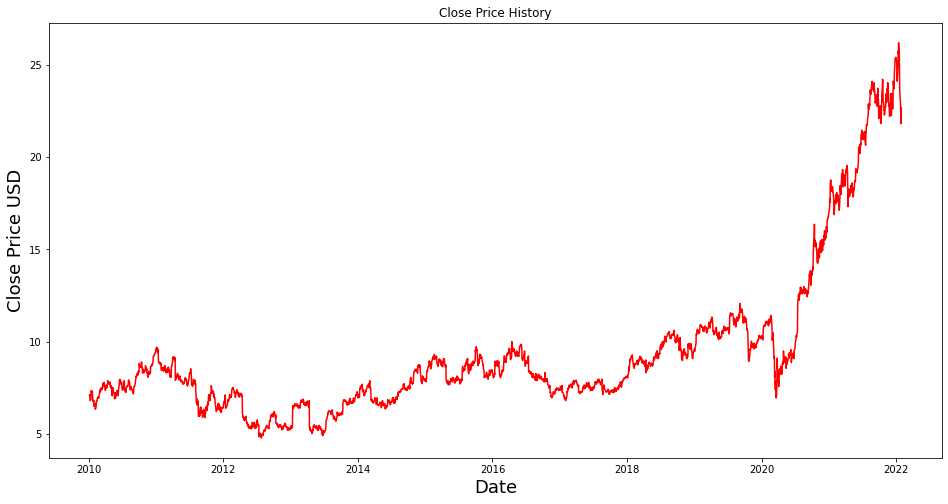

In [8]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

The next step is to split the data into training and test sets to avoid overfitting and to be able to investigate the generalization ability of our model. 

In [9]:
# Create a new data frame with only 'Close column'
data = data.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.7)  # number of rows to train the model on
training_data_len

2128

**Scale the data**




In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.10844076],
       [0.10972408],
       [0.10464912],
       ...,
       [0.8222014 ],
       [0.79513496],
       [0.83480134]])

# **Create the training dataset, scaled training dataset**

In [11]:
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.10844076, 0.10972408, 0.10464912, 0.09467421, 0.09549087,
       0.09718252, 0.11363238, 0.11894067, 0.12004899, 0.11532403,
       0.11870734, 0.11042407, 0.10313247, 0.09298255, 0.09525754,
       0.09269089, 0.09484921, 0.08265764, 0.08014933, 0.08569095,
       0.08691594, 0.08767427, 0.07303272, 0.07443271, 0.07554103,
       0.08802426, 0.08714927, 0.09391588, 0.09251589, 0.10103249,
       0.10050749, 0.1030158 , 0.10394913, 0.1035408 , 0.10120749,
       0.10674911, 0.10861576, 0.10925742, 0.11765735, 0.12197398,
       0.12174065, 0.11678235, 0.12477395, 0.12658227, 0.12430729,
       0.12623228, 0.1271656 , 0.12220731, 0.12448229, 0.12804059,
       0.13399054, 0.13766551, 0.1314239 , 0.13661552, 0.14087382,
       0.13562386, 0.13690719, 0.13270722, 0.12909058, 0.12576561])]
[0.12039899105645499]



In [12]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [13]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2068, 60, 1)

In [14]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [15]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
2068/2068 [==============================] - 40s 18ms/step - loss: 2.9371e-04
Epoch 2/10
2068/2068 [==============================] - 38s 18ms/step - loss: 1.1400e-04
Epoch 3/10
2068/2068 [==============================] - 37s 18ms/step - loss: 9.4327e-05
Epoch 4/10
2068/2068 [==============================] - 37s 18ms/step - loss: 8.2834e-05
Epoch 5/10
2068/2068 [==============================] - 38s 19ms/step - loss: 7.2142e-05
Epoch 6/10
2068/2068 [==============================] - 38s 18ms/step - loss: 7.6282e-05
Epoch 7/10
2068/2068 [==============================] - 38s 18ms/step - loss: 7.6651e-05
Epoch 8/10
2068/2068 [==============================] - 38s 18ms/step - loss: 6.9552e-05
Epoch 9/10
2068/2068 [==============================] - 38s 18ms/step - loss: 6.9159e-05
Epoch 10/10
2068/2068 [==============================] - 38s 18ms/step - loss: 6.6518e-05


In [17]:
#create the testing data sets
#create a new array containing scale values from index 1763 to 2518
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [18]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
y_test.shape

(912, 1)

In [20]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(912, 60, 1)

In [21]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
predictions.shape

(912, 1)

In [23]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.0959838313595955

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


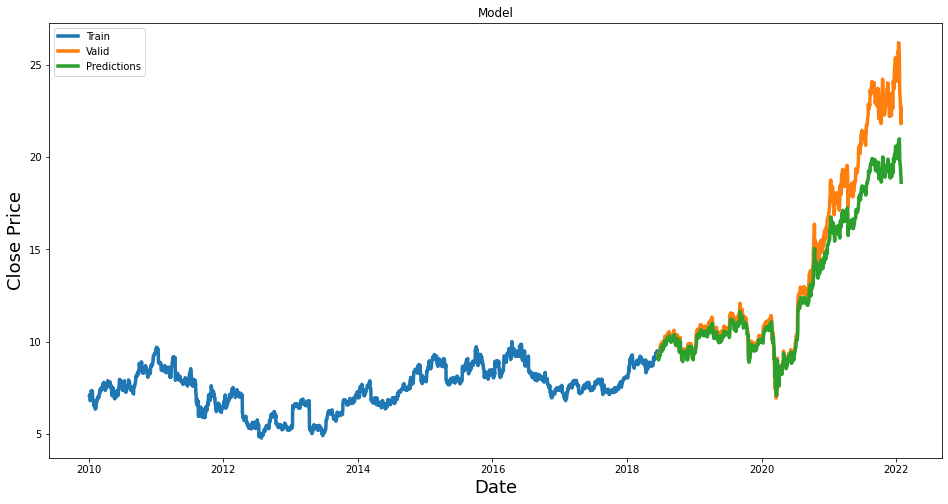

In [24]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'])

In [25]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-06-18,9.220000,9.260699
2018-06-19,9.100000,9.127697
2018-06-20,9.080000,9.026305
2018-06-21,9.115000,9.006857
2018-06-22,9.360000,9.035082
...,...,...
2022-01-24,22.940001,19.505003
2022-01-25,22.480000,19.254971
2022-01-26,22.389999,18.999462


In [26]:
#get the quote
amzn_quote = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Latest Dataset/INFY.csv')
#Create new data frame
new_df = amzn_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[19.088415]], dtype=float32)

# Accuracy Score - INFOSYS LSTM Prediction

In [27]:
# Measure the Accuracy Score
Acc = []
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, predictions)))
Acc.append(r2_score(y_test, predictions))

Accuracy score of the predictions: 0.8822061046650267




---



---



# 1.2 LSTM Modeling For TCS Stock

In [62]:
data_G = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Latest Dataset/TCS.NS.csv')

In [63]:
data_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2987 non-null   object 
 1   Open       2980 non-null   float64
 2   High       2980 non-null   float64
 3   Low        2980 non-null   float64
 4   Close      2980 non-null   float64
 5   Adj Close  2980 non-null   float64
 6   Volume     2980 non-null   float64
dtypes: float64(6), object(1)
memory usage: 163.5+ KB


In [64]:
#Change the date foramt and set it as index
#dtype.data_G['Date']
data_G['Date'] = pd.to_datetime(data_G['Date'])
data_G.set_index('Date',inplace=True)
data_G.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2987 entries, 2010-01-04 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2980 non-null   float64
 1   High       2980 non-null   float64
 2   Low        2980 non-null   float64
 3   Close      2980 non-null   float64
 4   Adj Close  2980 non-null   float64
 5   Volume     2980 non-null   float64
dtypes: float64(6)
memory usage: 163.4 KB


In [65]:
data_G.shape

(2987, 6)

In [67]:
#Fiding the null values(nan) in the dataframe
data_G.isnull().sum().sum()

42

In [74]:
#Dropping the nan records
data_G = data_G.dropna()  

In [75]:
data_G.shape

(2980, 6)

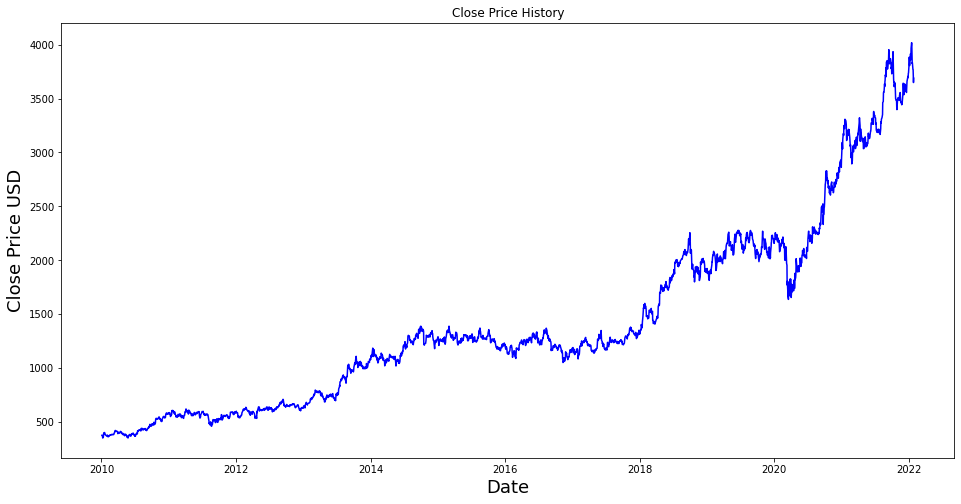

In [76]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data_G['Close'], color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [85]:
# Create a new data frame with only 'Close column'
data_G = data_G.filter(['Close'])
dataset_G = data_G.values #convert the data frame to a numpy array
training_data_len_G = math.ceil(len(dataset_G)*.7)  # number of rows to train the model on
training_data_len_G

2086

In [87]:
#Scale the data
scaler_G = MinMaxScaler(feature_range=(0,1))
scaled_data_G = scaler_G.fit_transform(dataset_G)
scaled_data_G

array([[0.00709931],
       [0.00712655],
       [0.00481008],
       ...,
       [0.9320729 ],
       [0.89919267],
       [0.91031174]])

In [88]:
train_data_G = scaled_data_G[0:training_data_len_G, :]
#Split the data into x_train, y_train datasets
x_train_G = []
y_train_G = []
for i in range(60,len(train_data_G)):
    x_train_G.append(train_data_G[i-60:i, 0])
    y_train_G.append(train_data_G[i,0])
    if i<=60:
        print(x_train_G)
        print(y_train_G)
        print()

[array([7.09930674e-03, 7.12655279e-03, 4.81008195e-03, 2.02351032e-03,
       3.40657477e-05, 1.99625609e-03, 6.88128104e-03, 1.21274062e-02,
       1.09419165e-02, 1.25157606e-02, 1.39873993e-02, 1.10577450e-02,
       1.08806047e-02, 9.68830356e-03, 7.94413074e-03, 7.71930171e-03,
       5.96150586e-03, 5.75029985e-03, 4.99404189e-03, 6.34986029e-03,
       5.29382211e-03, 7.27644699e-03, 5.33469937e-03, 3.26350027e-03,
       3.35207448e-03, 4.85096738e-03, 4.46261295e-03, 5.87975133e-03,
       6.34986029e-03, 7.98501618e-03, 8.05314767e-03, 8.07358222e-03,
       6.94941254e-03, 7.86237621e-03, 8.52324845e-03, 8.96610317e-03,
       9.08874313e-03, 8.48237119e-03, 8.67314265e-03, 9.42940061e-03,
       8.76852838e-03, 8.59137995e-03, 8.60501115e-03, 9.42258910e-03,
       1.09691708e-02, 1.25430067e-02, 1.32720186e-02, 1.61403529e-02,
       1.76392458e-02, 1.92335244e-02, 1.72100141e-02, 1.65355189e-02,
       1.74484744e-02, 1.75915570e-02, 1.77482546e-02, 1.71010054e-02,
     

In [89]:
#convert the x_train_G and y_train_G  to numppy array
x_train_G,y_train_G = np.array(x_train_G), np.array(y_train_G)

In [90]:
#reshape the data
x_train_G = np.reshape(x_train_G,(x_train_G.shape[0],x_train_G.shape[1],1))
x_train_G.shape

(2026, 60, 1)

In [91]:
#BuilD the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train_G.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))


In [92]:

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [93]:
#Train the model
model.fit(x_train_G,y_train_G, batch_size=1, epochs=8)


Epoch 1/8
2026/2026 [==============================] - 47s 22ms/step - loss: 2.5916e-04
Epoch 2/8
2026/2026 [==============================] - 46s 22ms/step - loss: 1.3983e-04
Epoch 3/8
2026/2026 [==============================] - 38s 19ms/step - loss: 8.2591e-05
Epoch 4/8
2026/2026 [==============================] - 39s 19ms/step - loss: 7.4912e-05
Epoch 5/8
2026/2026 [==============================] - 38s 19ms/step - loss: 6.1780e-05
Epoch 6/8
2026/2026 [==============================] - 38s 19ms/step - loss: 5.6009e-05
Epoch 7/8
2026/2026 [==============================] - 38s 19ms/step - loss: 5.3561e-05
Epoch 8/8
2026/2026 [==============================] - 38s 19ms/step - loss: 5.0058e-05


In [94]:
#create the testing data sets
test_data_G= scaled_data_G[training_data_len_G-60:, :]

#create the data sets x_test_G and y_test_G
x_test_G = []
y_test_G = dataset_G[training_data_len_G:,:]
for i in range(60,len(test_data_G)):
    x_test_G.append(test_data_G[i-60:i,0])

In [95]:
y_test_G.shape

(894, 1)

In [96]:
#convert the data to a numpy array
x_test_G = np.array(x_test_G)
#y_test_G = np.array(y_test_G)

#reshape the data
x_test_G = np.reshape(x_test_G, (x_test_G.shape[0], x_test_G.shape[1],1))
x_test_G.shape

(894, 60, 1)

In [97]:
#predicting the data
predictions_G = model.predict(x_test_G)
predictions_G = scaler_G.inverse_transform(predictions_G)

In [98]:
predictions_G.shape

(894, 1)

In [99]:
#get the root mean square error(RMSE)
#def root_mean_squared_error(y_true, y_pred):
 #   return K.abs(K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)))
rmse = np.sqrt(np.mean(predictions_G - y_test_G)**2)
rmse

17.735037782901635

In [100]:
print(training_data_len_G)

2086


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


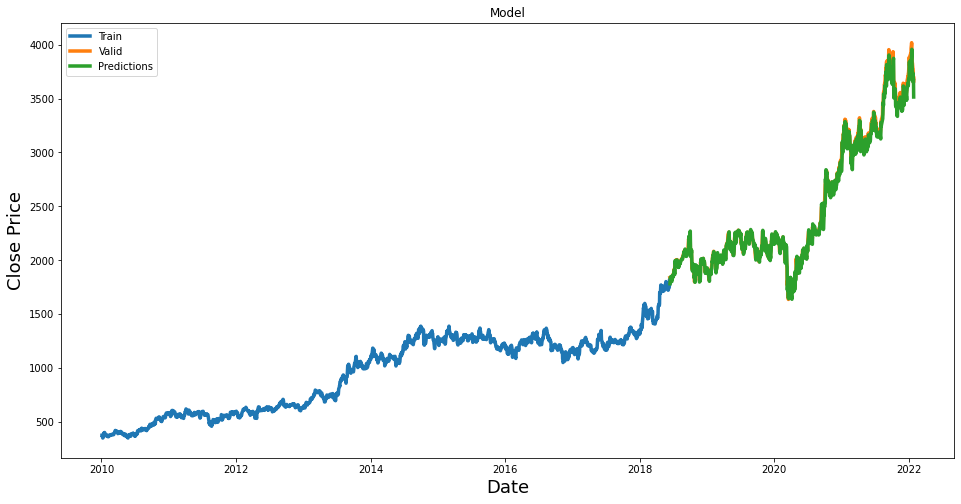

In [101]:
#plot the data
train = data_G[:training_data_len_G]
valid = data_G[training_data_len_G:]
valid['Predictions'] = predictions_G
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'])

In [102]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-06-15,1840.050049,1781.515625
2018-06-18,1829.000000,1845.214233
2018-06-19,1824.500000,1823.840820
2018-06-20,1822.449951,1819.855713
2018-06-21,1819.349976,1815.852783
...,...,...
2022-01-21,3833.500000,3693.436279
2022-01-24,3771.350098,3739.726562
2022-01-25,3769.899902,3654.323486


In [103]:
#get the quote
goog_quote = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Latest Dataset/TCS.NS.csv')
#Create new data frame
new_df = goog_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test_G = []
#append the past 60 days 
X_test_G.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test_G = np.array(X_test_G)
#Reshape the data
X_test_G = np.reshape(X_test_G,(X_test_G.shape[0], X_test_G.shape[1],1))
#get the predicted scaled price
pred_price_G= model.predict(X_test_G)
#undo the scalling
pred_price_G = scaler_G.inverse_transform(pred_price_G)
pred_price_G


array([[19721.8]], dtype=float32)

#  Accuracy Score - TCS LSTM Prediction 

In [104]:
# Measure the Accuracy Score
Acc_G = []
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test_G, predictions_G)))
Acc_G.append(r2_score(y_test_G, predictions_G))

Accuracy score of the predictions: 0.9933840627675161


# 2. Stock Price Predicting with - The AutoRegressive Integrated Moving Average (ARIMA) model

Time-series & forecasting models Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. Non-stationary data are called the data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time. These non-stationary input data (used as input to these models) are usually called time-series. Some examples of time-series include the temperature values over time, stock price over time, price of a house over time etc. So, the input is a signal (time-series) that is defined by observations taken sequentially in time.A time series is a sequence of observations taken sequentially in time.



*   AR: < Auto Regressive > means that the model uses the dependent relationship 
between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).


*   I:< Integrated > means that the model employs differencing of raw observations (e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary


*   MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations.
Model parameters

The standard ARIMA models expect as input parameters 3 arguments i.e. p,d,q. p is the number of lag observations. d is the degree of differencing. q is the size/width of the moving average window.

# 2.1 INFOSYS Stock Price Prediction 

In [105]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [106]:
Adata = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Latest Dataset/INFY.csv')
Adata['Date'] = pd.to_datetime(Adata['Date'])
Adata.set_index('Date',inplace=True)

In [107]:
Adata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3040 entries, 2010-01-04 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3040 non-null   float64
 1   High       3040 non-null   float64
 2   Low        3040 non-null   float64
 3   Close      3040 non-null   float64
 4   Adj Close  3040 non-null   float64
 5   Volume     3040 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 166.2 KB


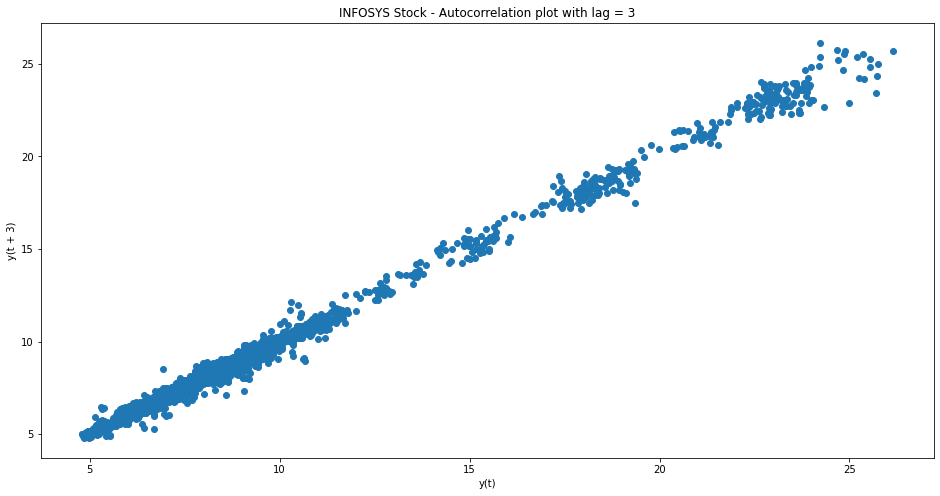

In [108]:
#Our target variable will be the Close value.
#Before building the ARIMA model, let’s see if there is some cross-correlation in our data.
plt.figure(figsize=(16,8))
lag_plot(Adata['Open'], lag=3)
plt.title('INFOSYS Stock - Autocorrelation plot with lag = 3')
plt.show()


We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

Finally, let’s plot the stock price evolution over time.

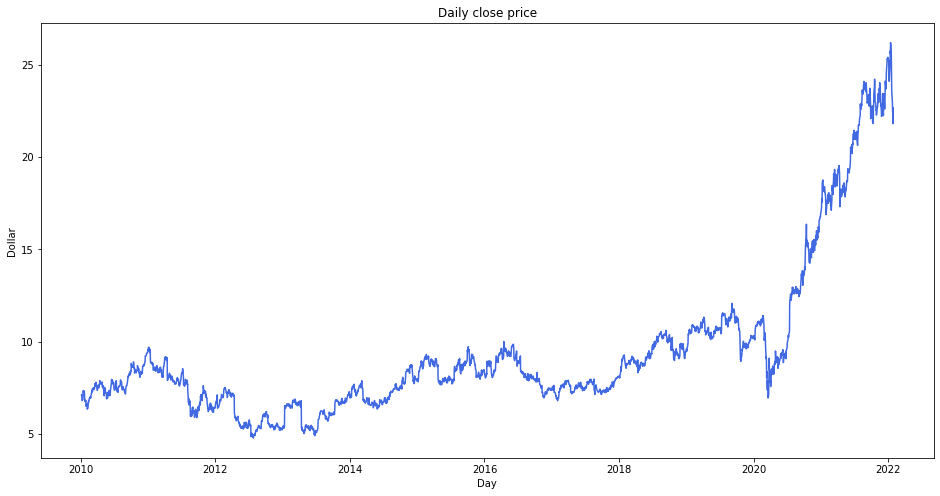

In [109]:
plt.figure(figsize=(16,8))
plt.plot(Adata.index, Adata['Close'], color='royalblue')
plt.title('Daily close price')
plt.xlabel('Day')
plt.ylabel('Dollar')
plt.show()

Build the predictive ARIMA model

Next, let’s divide the data into a training (70 % ) and test (30%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [110]:
train_data, test_data = Adata[0:int(len(Adata)*0.7)], Adata[int(len(Adata)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.06967482156970134


Summary of the code We split the training dataset into train and test sets and we use the train set to fit the model, and generate a prediction for each element on the test set. A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received. Finally, we manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended at each iteration. Testing Mean Squared Error is **0.06967482156970134**

The MSE of the test set is quite large denoting that the precise prediction is a hard problem. However, this is the average squared value across all the test set predictions. Let’s visualize the predictions to understand the performance of the model more.

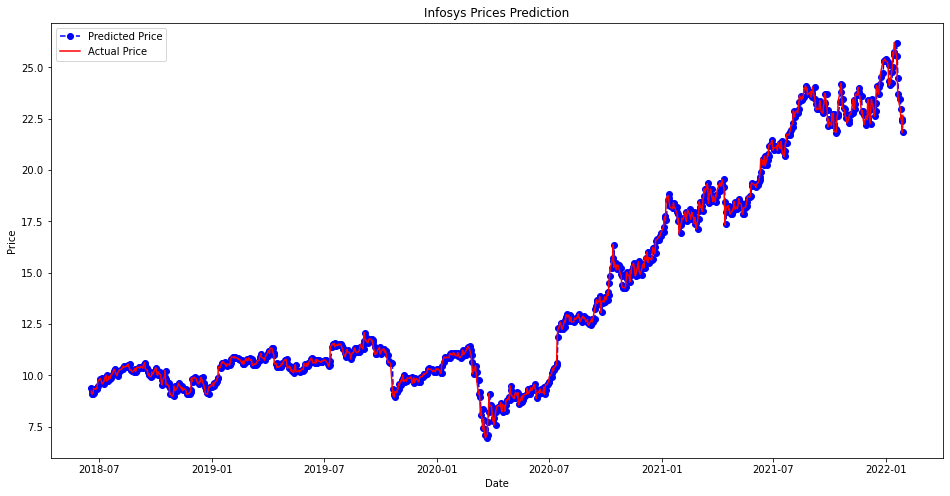

In [111]:
test_set_range = Adata[int(len(Adata)*0.7):].index
plt.figure(figsize=(16,8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Infosys Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [112]:
#Get records from dataframe to plot VALID tabular comparison of Close Prediction
Adata = Adata.filter(['Close'])
Adataset = Adata.values #convert the data frame to a numpy array
Atraining_data_len = math.ceil(len(Adataset)*.7)  # number of rows to train the model on
Atraining_data_len

2128

In [113]:
#Plot the Close & Prediction values
train = Adata[:Atraining_data_len]
valid = Adata[Atraining_data_len - 0:]
model_predictions = np.array(model_predictions)
valid['Predictions'] = model_predictions
#Visialization the datamodel_predictions.shape
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Predictions
Date,,
2018-06-18,9.220000,9.358062
2018-06-19,9.100000,9.231164
2018-06-20,9.080000,9.094359
2018-06-21,9.115000,9.091452
2018-06-22,9.360000,9.112716
...,...,...
2022-01-24,22.940001,23.433837
2022-01-25,22.480000,22.965183
2022-01-26,22.389999,22.481134


# Accuracy score  - INFOSYS ARIMA prediction

In [114]:

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(test_data, model_predictions)))
Acc.append(r2_score(test_data, model_predictions))

Accuracy score of the predictions: 0.9972958056893855


# 2.2 TCS Stock Price Prediction Using ARIMA

In [115]:
Adata_G = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Latest Dataset/TCS.NS.csv')
Adata_G['Date'] = pd.to_datetime(Adata_G['Date'])
Adata_G.set_index('Date',inplace=True)


In [116]:
Adata_G.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2987 entries, 2010-01-04 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2980 non-null   float64
 1   High       2980 non-null   float64
 2   Low        2980 non-null   float64
 3   Close      2980 non-null   float64
 4   Adj Close  2980 non-null   float64
 5   Volume     2980 non-null   float64
dtypes: float64(6)
memory usage: 163.4 KB


In [120]:
#Dropping the nan records
Adata_G = Adata_G.dropna()  

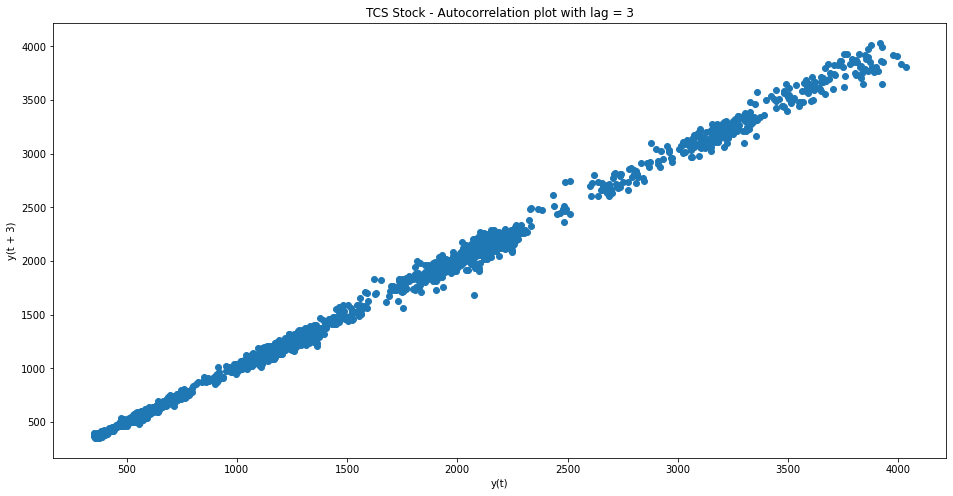

In [121]:
#Our target variable will be the Close value.
#Before building the ARIMA model, let’s see if there is some cross-correlation in our data.
plt.figure(figsize=(16,8))
lag_plot(Adata_G['Open'], lag=3)
plt.title('TCS Stock - Autocorrelation plot with lag = 3')
plt.show()


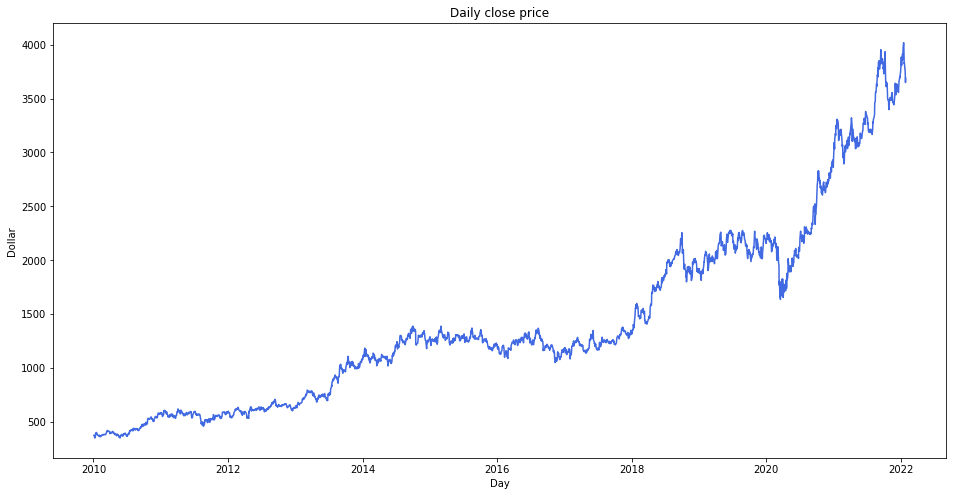

In [122]:
plt.figure(figsize=(16,8))
plt.plot(Adata_G.index, Adata_G['Close'], color='royalblue')
plt.title('Daily close price')
plt.xlabel('Day')
plt.ylabel('Dollar')
plt.show()

In [123]:
train_data_G, test_data_G = Adata_G[0:int(len(Adata_G)*0.7)], Adata_G[int(len(Adata_G)*0.7):]
training_data_G = train_data_G['Close'].values
test_data_G = test_data_G['Close'].values
history_G = [x for x in training_data_G]
model_predictions_G = []
N_test_observations_G = len(test_data_G)
for time_point in range(N_test_observations_G):
    model = ARIMA(history_G, order=(4,1,0))
    model_fit_G = model.fit(disp=0)
    output = model_fit_G.forecast()
    yhat = output[0]
    model_predictions_G.append(yhat)
    true_test_value_G= test_data_G[time_point]
    history_G.append(true_test_value_G)
MSE_error= mean_squared_error(test_data_G, model_predictions_G)
print('Testing Mean Squared Error is {}'.format(MSE_error))


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 1611.0576215256199


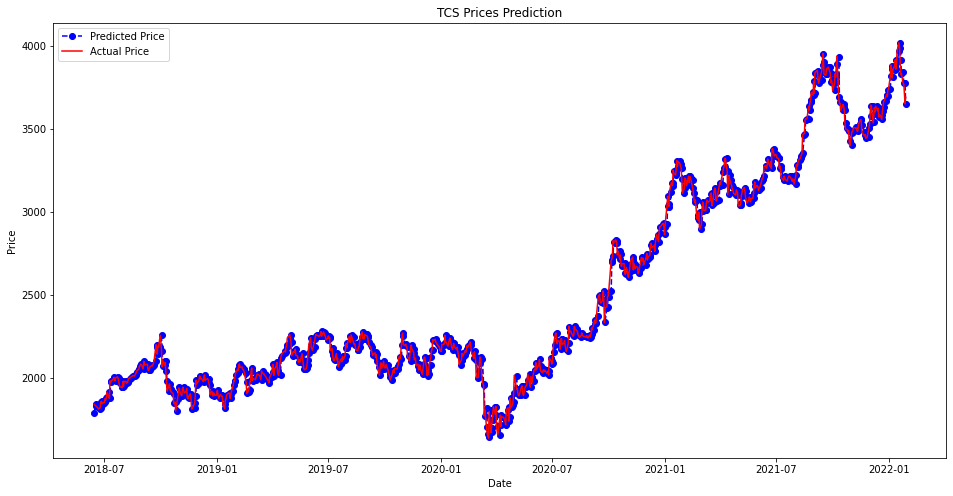

In [124]:
test_set_range_G = Adata_G[int(len(Adata_G)*0.7):].index
plt.figure(figsize=(16,8))
plt.plot(test_set_range_G, model_predictions_G, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range_G, test_data_G, color='red', label='Actual Price')
plt.title('TCS Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [125]:
#Get records from dataframe to plot VALID tabular comparison of Close Prediction
Adata_G = Adata_G.filter(['Close'])
Adataset_G = Adata_G.values #convert the data frame to a numpy array
Atraining_data_len_G = math.ceil(len(Adataset_G)*.7)  # number of rows to train the model on
Atraining_data_len_G

2086

In [129]:
#Plot the Close & Prediction values
train = Adata_G[:Atraining_data_len_G]
valid = Adata_G[Atraining_data_len_G - 0:]
model_predictions_G = np.array(model_predictions_G)
valid['Predictions'] = model_predictions_G
#Visialization the datamodel_predictions.shape
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Predictions
Date,,
2018-06-15,1840.050049,1787.224000
2018-06-18,1829.000000,1840.822525
2018-06-19,1824.500000,1827.248713
2018-06-20,1822.449951,1827.155836
2018-06-21,1819.349976,1820.936403
...,...,...
2022-01-21,3833.500000,3832.208094
2022-01-24,3771.350098,3839.563975
2022-01-25,3769.899902,3774.385047


# Accuracy score - TCS ARIMA Prediction 

In [130]:
# FInd the Accuracy score of the Googl ARIMA predictions
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(test_data_G, model_predictions_G)))
Acc_G.append(r2_score(test_data_G, model_predictions_G))

Accuracy score of the predictions: 0.9959303093415927


# INFOSYS Stock - Accuracies in LSTM & ARIMA  Model

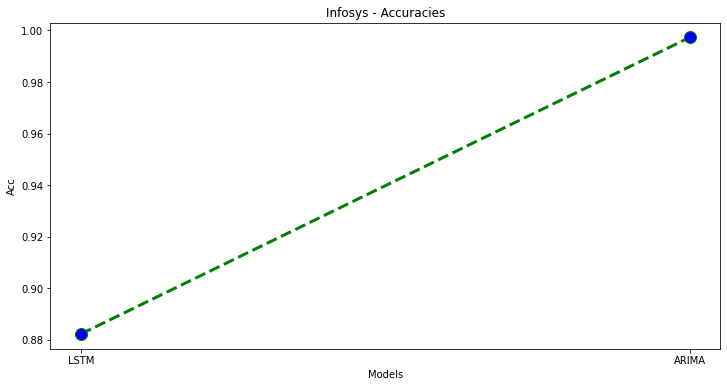

In [133]:
plt.figure(figsize=(12,6))
plt.plot(range(2), Acc, color='green', linestyle='dashed', linewidth = 3, 
          marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Infosys - Accuracies")
plt.xticks(range(2), ['LSTM','ARIMA'])
plt.show()

# TCS Stock - Accuracies in LSTM & ARIMA Model

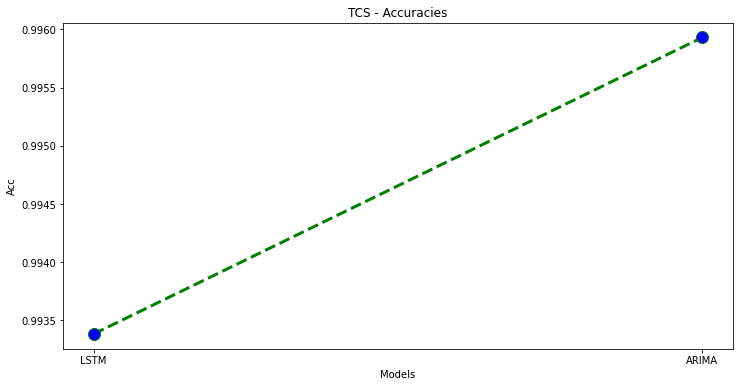

In [134]:
plt.figure(figsize=(12,6))
plt.plot(range(2), Acc_G, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("TCS - Accuracies")
plt.xticks(range(2), ['LSTM', 'ARIMA'])
plt.show()

**Conclusion**



*  ARIMA model results are appreciable . 
*  As shown for both INFOSYS & TCS, ARIMA model offers better prediction accuracy with respect to LSTM and is relatively fast as well to LSTM, in terms of training/fitting time and complexity.
*  ARIMA model predicts INFOSYS(99.72) to be better Stock than TCS(99.59) 

